In [1]:
# Import the Utility Functions
import pandas as pd
import numpy as np
import mls_utils as utils
import matplotlib.pyplot as plt


df = pd.read_csv("Clean_Data/mls_sfr_cleaned_3.csv")
df.head()

,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,...,Cluster,Price per SqFt,List Year,List Month,Closing Year,Closing Month,Price Increase Percentage,Age of Property,Geo Cluster,Log Sold Price
0,27607,5,8,2.646196,-0.219360,2022,2021-03-16,2022-02-23,2.397888,-0.608799,...,2,-2.543532,2021,3,2022,2,-10.283064,-0.895267,2,-0.938533
1,27377,5,7,2.646196,3.654051,1883,2021-09-27,2023-01-09,2.397888,2.361454,...,1,2.429647,2021,9,2023,1,-0.143221,4.608478,1,1.212374
2,27587,5,5,2.646196,3.008483,2005,2021-04-05,2021-05-27,2.397888,2.361454,...,0,2.429647,2021,4,2021,5,-0.143221,-0.266268,2,1.212374
3,27615,5,7,2.646196,0.426208,2022,2021-04-20,2022-09-28,2.397888,2.361454,...,0,2.429647,2021,4,2022,9,-0.143221,-0.895267,2,1.212374
4,27502,4,6,2.646196,1.717346,2023,2023-02-21,2023-11-21,2.397888,2.361454,...,2,2.429647,2023,2,2023,11,-0.143221,-0.895267,4,1.212374


In [2]:
#Covert the Nan values in Log Sold Price to 0
df['Log Sold Price'] = df['Log Sold Price'].fillna(0)

In [3]:
#Select features and target variables
features = ['Bedrooms', 'Total Baths', 'SqFt', 'Acres', 'Year Built', 'Days on Market', 'Over Asking', 'Lat', 'Price per SqFt', 'List Year', 'Closing Year',
       'Closing Month', 'Price Increase Percentage', 'Geo Cluster'] 
target = 'Sold Price'

In [4]:
# Split the data
X_train, X_test, y_train, y_test = utils.split_data(df, features, target)

# Scale the data
X_train_scaled, X_test_scaled = utils.scale_data(X_train, X_test)

In [5]:
# Feature selection
selected_features = utils.select_features(X_train_scaled, y_train)
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

In [6]:
# Ridge Regression
ridge_model = utils.tune_hyperparameters(X_train_selected, y_train, 'ridge')
ridge_train_mse, ridge_test_mse, ridge_train_r2, ridge_test_r2 = utils.evaluate_model(ridge_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Ridge Regression - Train MSE: {ridge_train_mse}')
print(f'Ridge Regression - Test MSE: {ridge_test_mse}')
print(f'Ridge Regression - Train R2: {ridge_train_r2}')
print(f'Ridge Regression - Test R2: {ridge_test_r2}')

Ridge Regression - Train MSE: 0.05706555568538567
Ridge Regression - Test MSE: 0.05730122676041564
Ridge Regression - Train R2: 0.9428755009883918
Ridge Regression - Test R2: 0.9428362671415593


In [7]:
# Lasso Regression
lasso_model = utils.tune_hyperparameters(X_train_selected, y_train, 'lasso')
lasso_train_mse, lasso_test_mse, lasso_train_r2, lasso_test_r2 = utils.evaluate_model(lasso_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Lasso Regression - Train MSE: {lasso_train_mse}')
print(f'Lasso Regression - Test MSE: {lasso_test_mse}')
print(f'Lasso Regression - Train R2: {lasso_train_r2}')
print(f'Lasso Regression - Test R2: {lasso_test_r2}')


Lasso Regression - Train MSE: 0.07709216278528778
Lasso Regression - Test MSE: 0.07755599974089376
Lasso Regression - Train R2: 0.9228282082959068
Lasso Regression - Test R2: 0.9226300953504125


In [8]:
# Decision Tree Regressor
dt_model = utils.tune_hyperparameters(X_train_selected, y_train, 'decision_tree')
dt_train_mse, dt_test_mse, dt_train_r2, dt_test_r2 = utils.evaluate_model(dt_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Decision Tree Regressor - Train MSE: {dt_train_mse}')
print(f'Decision Tree Regressor - Test MSE: {dt_test_mse}')
print(f'Decision Tree Regressor - Train R2: {dt_train_r2}')
print(f'Decision Tree Regressor - Test R2: {dt_test_r2}')

Decision Tree Regressor - Train MSE: 0.00582971129415464
Decision Tree Regressor - Test MSE: 0.00721456128115532
Decision Tree Regressor - Train R2: 0.994164267164997
Decision Tree Regressor - Test R2: 0.9928027500093295


In [9]:
# Random Forest Regressor
rf_model = utils.tune_hyperparameters(X_train_selected, y_train, 'random_forest')
rf_train_mse, rf_test_mse, rf_train_r2, rf_test_r2 = utils.evaluate_model(rf_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Random Forest Regressor - Train MSE: {rf_train_mse}')
print(f'Random Forest Regressor - Test MSE: {rf_test_mse}')
print(f'Random Forest Regressor - Train R2: {rf_train_r2}')
print(f'Random Forest Regressor - Test R2: {rf_test_r2}')

Random Forest Regressor - Train MSE: 0.005913432702432307
Random Forest Regressor - Test MSE: 0.006077591020315428
Random Forest Regressor - Train R2: 0.9940804592804164
Random Forest Regressor - Test R2: 0.9939369921177993


In [10]:
# Support Vector Regressor
svr_model = utils.tune_hyperparameters(X_train_selected, y_train, 'svm')
svr_train_mse, svr_test_mse, svr_train_r2, svr_test_r2 = utils.evaluate_model(svr_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Support Vector Regressor - Train MSE: {svr_train_mse}')
print(f'Support Vector Regressor - Test MSE: {svr_test_mse}')
print(f'Support Vector Regressor - Train R2: {svr_train_r2}')
print(f'Support Vector Regressor - Test R2: {svr_test_r2}')


Support Vector Regressor - Train MSE: 0.011037361755347204
Support Vector Regressor - Test MSE: 0.009461468538859225
Support Vector Regressor - Train R2: 0.9889512376930106
Support Vector Regressor - Test R2: 0.9905612341902335


In [11]:
# K-Nearest Neighbors Regressor
knn_model = utils.tune_hyperparameters(X_train_selected, y_train, 'knn')
knn_train_mse, knn_test_mse, knn_train_r2, knn_test_r2 = utils.evaluate_model(knn_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'K-Nearest Neighbors Regressor - Train MSE: {knn_train_mse}')
print(f'K-Nearest Neighbors Regressor - Test MSE: {knn_test_mse}')
print(f'K-Nearest Neighbors Regressor - Train R2: {knn_train_r2}')
print(f'K-Nearest Neighbors Regressor - Test R2: {knn_test_r2}')


K-Nearest Neighbors Regressor - Train MSE: 0.006815964456707552
K-Nearest Neighbors Regressor - Test MSE: 0.006279083957804405
K-Nearest Neighbors Regressor - Train R2: 0.9931769952961299
K-Nearest Neighbors Regressor - Test R2: 0.9937359826612366


Bar Charts for Error Metrics

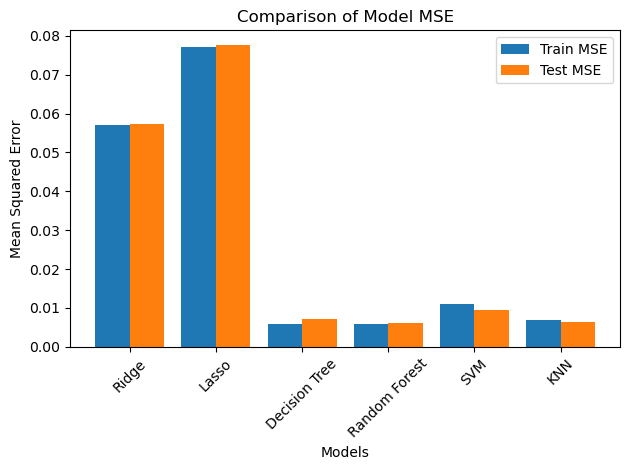

In [12]:
# Data
models = ['Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
train_mse = [ridge_train_mse, lasso_train_mse, dt_train_mse, rf_train_mse, svr_train_mse, knn_train_mse]
test_mse = [ridge_test_mse, lasso_test_mse, dt_test_mse, rf_test_mse, svr_test_mse, knn_test_mse]

x = range(len(models))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x, train_mse, width=0.4, label='Train MSE')
rects2 = ax.bar([p + 0.4 for p in x], test_mse, width=0.4, label='Test MSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Comparison of Model MSE')
ax.set_xticks([p + 0.2 for p in x])
ax.set_xticklabels(models, rotation=45)
ax.legend()

fig.tight_layout()

plt.show()